In [13]:
import matplotlib.pyplot as plt
import numpy as np

# number of data
N=4000
# size of each sample
L=2
# box size
B=100

!mkdir DATA

mkdir: cannot create directory ‘DATA’: File exists


2 5 1


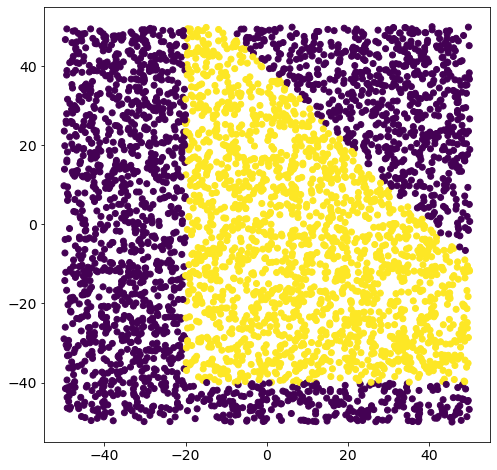

In [14]:
%run nonlinear_function.py

TYPE=1

# random seed for reproducibility
np.random.seed(12345)
print(np.random.randint(0,10),np.random.randint(0,10),np.random.randint(0,10))

x,y = (np.random.random((N,2))-0.5)*B, np.zeros(N)
for i in range(N):
    # label data according to a nonlinear function "f"
    y[i] = f(x[i],TYPE)
        
plt.figure(figsize = (8,8))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show

np.savetxt(filename("data",TYPE),x)
np.savetxt(filename("labels",TYPE),y,fmt="%d")

In [15]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout

import matplotlib.pyplot as plt
plt.rcParams['font.size']=14

%run nonlinear_function.py

#training data 
perc_train=0.8

2
[-31.60811883 -29.54397214] 0.0
[6.77250291 9.5544703 ] 1.0
[46.45145197 15.31770969] 0.0
[24.89066375 15.35698709] 0.0
[24.77148093 46.13067361] 0.0
[-49.16117021 -39.35556233] 0.0
[-20.12962862  15.64111831] 0.0
[30.98125525 37.21759137] 0.0
[46.46475974 22.36853469] 0.0
[14.24753279 21.74536208] 1.0
data: 4000
train: 3200


<function matplotlib.pyplot.show(close=None, block=None)>

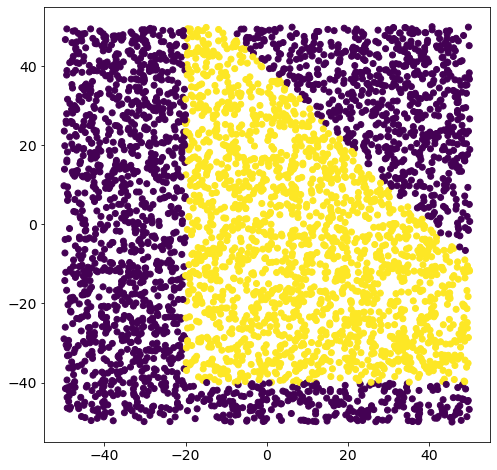

In [16]:
#keras work with numpy arrays: just use them from the start
TYPE=1
x= np.loadtxt(filename("data",TYPE), delimiter=' ')
y= np.loadtxt(filename("labels",TYPE), delimiter=' ')
N= len(x)

# dim. of a sample
L=len(x[0])
print(L)

for i in range(10):
    print(x[i],y[i])
    
N_train= int(perc_train*N)
print(f'data: {N}\ntrain: {N_train}')

plt.figure(figsize =(8,8))
plt.scatter(x[:,0],x[:,1],c=y)
plt.show

In [17]:
(x_train, y_train)=(x[0:N_train],y[0:N_train])
(x_valid, y_valid)=(x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 3200 	 Validation: 800


In [18]:
def Rescale(x):
    return (x-x.mean())/np.sqrt(x.var())
    #return x/50

x_train = Rescale(x_train)
x_valid = Rescale(x_valid)
print(x_train)

[[-1.09854886 -1.02696928]
 [ 0.23239757  0.32886942]
 [ 1.60836682  0.52872451]
 ...
 [-1.71033821 -0.58010476]
 [ 0.45209286 -0.58910521]
 [ 1.55988736  0.94632066]]


In [19]:
# reproducibility
np.random.seed(12345)

CASE=1

if CASE==1:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='relu'))
    model.add(Dense(25,activation='elu'))
    model.add(Dense(25,activation='elu'))
    model.add(Dense(25,activation='elu'))
    model.add(Dense(25,activation='elu'))
    model.add(Dense(25,activation='elu'))
    model.add(Dense(25,activation='elu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation='sigmoid'))
    nepoch=400
if CASE==2:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='sigmoid'))
    model.add(Dense(20,activation='sigmoid'))
    model.add(Dense(20,activation='sigmoid'))
    nepoch=400
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 2)                 6         
                                                                 
 dense_9 (Dense)             (None, 25)                75        
                                                                 
 dense_10 (Dense)            (None, 25)                650       
                                                                 
 dense_11 (Dense)            (None, 25)                650       
                                                                 
 dense_12 (Dense)            (None, 25)                650       
                                                                 
 dense_13 (Dense)            (None, 25)                650       
                                                                 
 dense_14 (Dense)            (None, 25)               

In [20]:
model.compile(loss='binary_crossentropy',
               optimizer="RMSprop",
               #optimizer='adam',
               metrics=['accuracy'])

In [21]:
fit = model.fit(x_train, y_train,
                epochs = nepoch, batch_size = 50,
                validation_data=(x_valid,y_valid),
                verbose=2)

Epoch 1/400
64/64 - 1s - loss: 0.6032 - accuracy: 0.7069 - val_loss: 0.5944 - val_accuracy: 0.7325 - 1s/epoch - 18ms/step
Epoch 2/400
64/64 - 0s - loss: 0.5658 - accuracy: 0.7484 - val_loss: 0.5790 - val_accuracy: 0.7287 - 151ms/epoch - 2ms/step
Epoch 3/400
64/64 - 0s - loss: 0.5375 - accuracy: 0.7572 - val_loss: 0.5374 - val_accuracy: 0.7387 - 141ms/epoch - 2ms/step
Epoch 4/400
64/64 - 0s - loss: 0.5127 - accuracy: 0.7678 - val_loss: 0.5234 - val_accuracy: 0.7437 - 142ms/epoch - 2ms/step
Epoch 5/400
64/64 - 0s - loss: 0.4977 - accuracy: 0.7675 - val_loss: 0.5019 - val_accuracy: 0.7475 - 136ms/epoch - 2ms/step
Epoch 6/400
64/64 - 0s - loss: 0.4883 - accuracy: 0.7728 - val_loss: 0.4857 - val_accuracy: 0.7462 - 143ms/epoch - 2ms/step
Epoch 7/400
64/64 - 0s - loss: 0.4806 - accuracy: 0.7750 - val_loss: 0.4804 - val_accuracy: 0.7613 - 147ms/epoch - 2ms/step
Epoch 8/400
64/64 - 0s - loss: 0.4731 - accuracy: 0.7750 - val_loss: 0.4752 - val_accuracy: 0.7688 - 144ms/epoch - 2ms/step
Epoch 9/40

Epoch 67/400
64/64 - 0s - loss: 0.3241 - accuracy: 0.8409 - val_loss: 0.3083 - val_accuracy: 0.8525 - 141ms/epoch - 2ms/step
Epoch 68/400
64/64 - 0s - loss: 0.3196 - accuracy: 0.8431 - val_loss: 0.3031 - val_accuracy: 0.8413 - 139ms/epoch - 2ms/step
Epoch 69/400
64/64 - 0s - loss: 0.3154 - accuracy: 0.8397 - val_loss: 0.2879 - val_accuracy: 0.8700 - 139ms/epoch - 2ms/step
Epoch 70/400
64/64 - 0s - loss: 0.3127 - accuracy: 0.8438 - val_loss: 0.2839 - val_accuracy: 0.8662 - 134ms/epoch - 2ms/step
Epoch 71/400
64/64 - 0s - loss: 0.3123 - accuracy: 0.8469 - val_loss: 0.3010 - val_accuracy: 0.8462 - 139ms/epoch - 2ms/step
Epoch 72/400
64/64 - 0s - loss: 0.3038 - accuracy: 0.8494 - val_loss: 0.2884 - val_accuracy: 0.8587 - 140ms/epoch - 2ms/step
Epoch 73/400
64/64 - 0s - loss: 0.2941 - accuracy: 0.8559 - val_loss: 0.3178 - val_accuracy: 0.8363 - 141ms/epoch - 2ms/step
Epoch 74/400
64/64 - 0s - loss: 0.2984 - accuracy: 0.8497 - val_loss: 0.2704 - val_accuracy: 0.8750 - 137ms/epoch - 2ms/step


Epoch 133/400
64/64 - 0s - loss: 0.0932 - accuracy: 0.9628 - val_loss: 0.1005 - val_accuracy: 0.9538 - 135ms/epoch - 2ms/step
Epoch 134/400
64/64 - 0s - loss: 0.0834 - accuracy: 0.9653 - val_loss: 0.0819 - val_accuracy: 0.9663 - 143ms/epoch - 2ms/step
Epoch 135/400
64/64 - 0s - loss: 0.0817 - accuracy: 0.9622 - val_loss: 0.0684 - val_accuracy: 0.9625 - 138ms/epoch - 2ms/step
Epoch 136/400
64/64 - 0s - loss: 0.0830 - accuracy: 0.9641 - val_loss: 0.0648 - val_accuracy: 0.9688 - 139ms/epoch - 2ms/step
Epoch 137/400
64/64 - 0s - loss: 0.0805 - accuracy: 0.9669 - val_loss: 0.0590 - val_accuracy: 0.9712 - 144ms/epoch - 2ms/step
Epoch 138/400
64/64 - 0s - loss: 0.0815 - accuracy: 0.9653 - val_loss: 0.0795 - val_accuracy: 0.9625 - 140ms/epoch - 2ms/step
Epoch 139/400
64/64 - 0s - loss: 0.0819 - accuracy: 0.9672 - val_loss: 0.0787 - val_accuracy: 0.9625 - 143ms/epoch - 2ms/step
Epoch 140/400
64/64 - 0s - loss: 0.0771 - accuracy: 0.9641 - val_loss: 0.0828 - val_accuracy: 0.9600 - 139ms/epoch - 2

64/64 - 0s - loss: 0.0604 - accuracy: 0.9756 - val_loss: 0.0346 - val_accuracy: 0.9837 - 157ms/epoch - 2ms/step
Epoch 199/400
64/64 - 0s - loss: 0.0623 - accuracy: 0.9728 - val_loss: 0.0335 - val_accuracy: 0.9862 - 141ms/epoch - 2ms/step
Epoch 200/400
64/64 - 0s - loss: 0.0640 - accuracy: 0.9750 - val_loss: 0.1176 - val_accuracy: 0.9463 - 144ms/epoch - 2ms/step
Epoch 201/400
64/64 - 0s - loss: 0.0647 - accuracy: 0.9731 - val_loss: 0.0525 - val_accuracy: 0.9750 - 145ms/epoch - 2ms/step
Epoch 202/400
64/64 - 0s - loss: 0.0548 - accuracy: 0.9794 - val_loss: 0.0513 - val_accuracy: 0.9725 - 140ms/epoch - 2ms/step
Epoch 203/400
64/64 - 0s - loss: 0.0526 - accuracy: 0.9784 - val_loss: 0.0373 - val_accuracy: 0.9837 - 141ms/epoch - 2ms/step
Epoch 204/400
64/64 - 0s - loss: 0.0612 - accuracy: 0.9712 - val_loss: 0.0532 - val_accuracy: 0.9775 - 180ms/epoch - 3ms/step
Epoch 205/400
64/64 - 0s - loss: 0.0580 - accuracy: 0.9750 - val_loss: 0.0500 - val_accuracy: 0.9750 - 183ms/epoch - 3ms/step
Epoch 

Epoch 264/400
64/64 - 0s - loss: 0.0590 - accuracy: 0.9766 - val_loss: 0.0388 - val_accuracy: 0.9837 - 152ms/epoch - 2ms/step
Epoch 265/400
64/64 - 0s - loss: 0.0532 - accuracy: 0.9766 - val_loss: 0.0211 - val_accuracy: 0.9937 - 143ms/epoch - 2ms/step
Epoch 266/400
64/64 - 0s - loss: 0.0514 - accuracy: 0.9787 - val_loss: 0.0398 - val_accuracy: 0.9837 - 144ms/epoch - 2ms/step
Epoch 267/400
64/64 - 0s - loss: 0.0613 - accuracy: 0.9725 - val_loss: 0.0434 - val_accuracy: 0.9812 - 143ms/epoch - 2ms/step
Epoch 268/400
64/64 - 0s - loss: 0.0528 - accuracy: 0.9775 - val_loss: 0.0464 - val_accuracy: 0.9812 - 143ms/epoch - 2ms/step
Epoch 269/400
64/64 - 0s - loss: 0.0602 - accuracy: 0.9722 - val_loss: 0.0329 - val_accuracy: 0.9887 - 194ms/epoch - 3ms/step
Epoch 270/400
64/64 - 0s - loss: 0.0591 - accuracy: 0.9769 - val_loss: 0.0530 - val_accuracy: 0.9737 - 181ms/epoch - 3ms/step
Epoch 271/400
64/64 - 0s - loss: 0.0537 - accuracy: 0.9753 - val_loss: 0.0286 - val_accuracy: 0.9925 - 142ms/epoch - 2

64/64 - 0s - loss: 0.0534 - accuracy: 0.9784 - val_loss: 0.0294 - val_accuracy: 0.9875 - 141ms/epoch - 2ms/step
Epoch 330/400
64/64 - 0s - loss: 0.0530 - accuracy: 0.9781 - val_loss: 0.0276 - val_accuracy: 0.9912 - 139ms/epoch - 2ms/step
Epoch 331/400
64/64 - 0s - loss: 0.0524 - accuracy: 0.9800 - val_loss: 0.0406 - val_accuracy: 0.9825 - 143ms/epoch - 2ms/step
Epoch 332/400
64/64 - 0s - loss: 0.0530 - accuracy: 0.9791 - val_loss: 0.0245 - val_accuracy: 0.9925 - 137ms/epoch - 2ms/step
Epoch 333/400
64/64 - 0s - loss: 0.0522 - accuracy: 0.9791 - val_loss: 0.0264 - val_accuracy: 0.9912 - 141ms/epoch - 2ms/step
Epoch 334/400
64/64 - 0s - loss: 0.0502 - accuracy: 0.9787 - val_loss: 0.0486 - val_accuracy: 0.9750 - 142ms/epoch - 2ms/step
Epoch 335/400
64/64 - 0s - loss: 0.0562 - accuracy: 0.9750 - val_loss: 0.0301 - val_accuracy: 0.9875 - 141ms/epoch - 2ms/step
Epoch 336/400
64/64 - 0s - loss: 0.0500 - accuracy: 0.9797 - val_loss: 0.0373 - val_accuracy: 0.9825 - 144ms/epoch - 2ms/step
Epoch 

Epoch 395/400
64/64 - 0s - loss: 0.0479 - accuracy: 0.9797 - val_loss: 0.0200 - val_accuracy: 0.9937 - 139ms/epoch - 2ms/step
Epoch 396/400
64/64 - 0s - loss: 0.0478 - accuracy: 0.9791 - val_loss: 0.0393 - val_accuracy: 0.9787 - 138ms/epoch - 2ms/step
Epoch 397/400
64/64 - 0s - loss: 0.0497 - accuracy: 0.9803 - val_loss: 0.0492 - val_accuracy: 0.9800 - 147ms/epoch - 2ms/step
Epoch 398/400
64/64 - 0s - loss: 0.0502 - accuracy: 0.9787 - val_loss: 0.0403 - val_accuracy: 0.9787 - 143ms/epoch - 2ms/step
Epoch 399/400
64/64 - 0s - loss: 0.0484 - accuracy: 0.9778 - val_loss: 0.0915 - val_accuracy: 0.9688 - 146ms/epoch - 2ms/step
Epoch 400/400
64/64 - 0s - loss: 0.0542 - accuracy: 0.9781 - val_loss: 0.0422 - val_accuracy: 0.9825 - 139ms/epoch - 2ms/step


[0.05417380481958389, 0.04219682142138481]


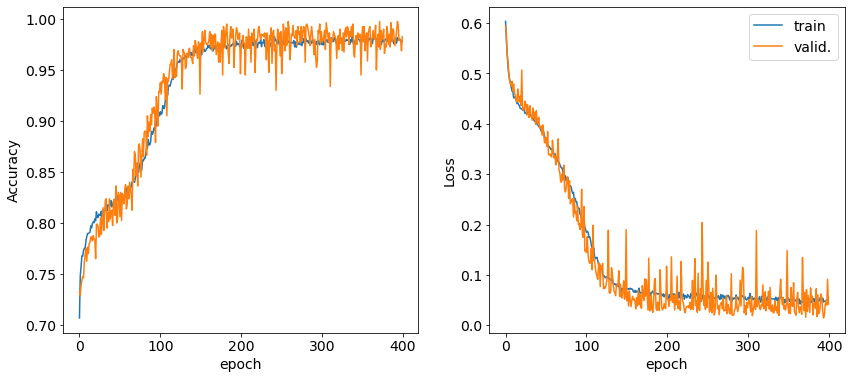

In [22]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit.history['accuracy'],label="train")
ax.plot(fit.history['val_accuracy'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Accuracy")
ax=AX[1]
ax.plot(fit.history['loss'],label="train")
ax.plot(fit.history['val_loss'],label="valid.")
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()
a=[]
a.append(fit.history['loss'][-1])
a.append(fit.history['val_loss'][-1])
print(a)
plt.savefig('LC_1F_1G.png')

In [23]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

# RESCALE

grid_r = grid/(50/x_train[:,1].max())
print(grid_r)
pred = model.predict(grid_r)

51 2601
[50. 50.]
[[-1.73132788 -1.73132788]
 [-1.66207477 -1.73132788]
 [-1.59282165 -1.73132788]
 ...
 [ 1.59282165  1.73132788]
 [ 1.66207477  1.73132788]
 [ 1.73132788  1.73132788]]


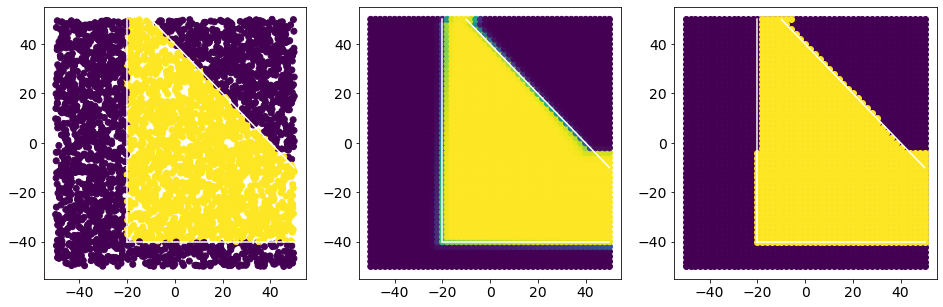

In [24]:
def boundaries():    
    ax.plot((-20,-20),(-40,50),c="w")
    ax.plot((-20,50),(-40,-40),c="w")
    ax.plot((-10,50),(50,-10),c="w")
fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x[:,0],x[:,1],c=y)
boundaries()
ax=AX[1]
ax.scatter(grid[:,0],grid[:,1],c=pred)
boundaries()
ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()
plt.show
plt.show
plt.savefig('1F_1G.png')